In [51]:
import pandas as pd
import numpy as np

import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [52]:
df_Numeric = pd.read_excel(r"mergeHome_Numeric.xlsx")
df_Numeric.drop("Unnamed: 0", axis = 1, inplace = True)

# Bagımlı Degisken -> Fiyat
# Bagımsız Degisken ayrımı -> Fiyaat dşındaki özellikler

X = df_Numeric.drop(["Fiyat"], axis = 1)
y = df_Numeric["Fiyat"]

Train and Test Data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

Model Traning

In [54]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

[1]	valid_0's l1: 7146.84	valid_0's l2: 8.38322e+07
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l1: 6951.1	valid_0's l2: 7.96108e+07
[3]	valid_0's l1: 6775.75	valid_0's l2: 7.58057e+07
[4]	valid_0's l1: 6636.99	valid_0's l2: 7.27817e+07
[5]	valid_0's l1: 6504.68	valid_0's l2: 7.03977e+07
[6]	valid_0's l1: 6384.56	valid_0's l2: 6.81839e+07
[7]	valid_0's l1: 6271.52	valid_0's l2: 6.63398e+07
[8]	valid_0's l1: 6170.74	valid_0's l2: 6.46654e+07
[9]	valid_0's l1: 6053.54	valid_0's l2: 6.26421e+07
[10]	valid_0's l1: 5969.67	valid_0's l2: 6.10921e+07
[11]	valid_0's l1: 5906.54	valid_0's l2: 6.01118e+07
[12]	valid_0's l1: 5793.33	valid_0's l2: 5.82743e+07
[13]	valid_0's l1: 5751.22	valid_0's l2: 5.75479e+07
[14]	valid_0's l1: 5695.4	valid_0's l2: 5.66108e+07
[15]	valid_0's l1: 5633.48	valid_0's l2: 5.55761e+07
[16]	valid_0's l1: 5552.65	valid_0's l2: 5.43516e+07
[17]	valid_0's l1: 5509.85	valid_0's l2: 5.36342e+07
[18]	valid_0's l1: 5424.96	valid_0's l2: 5.22147

Metrics

MSE: 33895750.89
RMSE: 5822.01
R2:  0.6195064149065161
MAE:  4150.669672389584
MAPE:  4150.669672389584


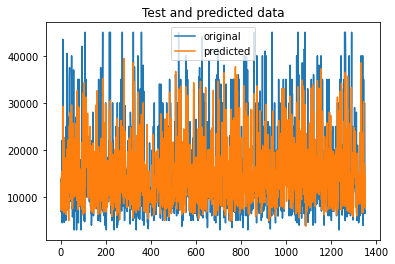

In [57]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mae)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

One Home

In [56]:
new_data = [[2],[61],[50],[10],[15],[5],[0],[31]]


new_data = pd.DataFrame(new_data).T

df_new = new_data.rename(columns={
     0: "Oda_Sayisi",
     1: "Brut",
     2: "Net",
     3: "Bulundugu_Kat",
     4: "Bina_Yas",
     5: "Isitma_Tipi",
     6: "Esya_Durumu",
     7: "Ilce"})

pred = model.predict(df_new)
pred

#7500

array([8827.74389096])